In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from google.colab import drive
# from google.colab import files
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [6]:
# drive.mount('/content/drive')

cloud_train = pd.read_csv(r"C:\Users\chris_pedretti\Downloads\cloud_train.csv")
cloud_test = pd.read_csv(r"C:\Users\chris_pedretti\Downloads\cloud_test.csv")

In [7]:
# uploaded = files.upload()

In [8]:
# cloud_test = pd.read_csv('/content/cloud_test.csv')

In [9]:
# uploaded = files.upload()

In [10]:
# cloud_train = pd.read_csv('/content/cloud_train.csv')

In [11]:
# Prepare training data
X_train = cloud_train.drop(columns=["Unnamed: 0", "label"])  # Features for training
y_train = cloud_train["label"]  # Target for training

# Prepare testing data
X_test = cloud_test.drop(columns=["Unnamed: 0", "label"])  # Features for testing
y_test = cloud_test["label"]  # Target for testing

In [12]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()

In [13]:
param_grid_dt = {
    'max_depth': [5, 30],
    'min_samples_leaf': [1, 4]
}

grid_search_dt = GridSearchCV(dt_clf, param_grid_dt, scoring='accuracy',cv=5)
grid_search_dt.fit(X_train, y_train)

# Get best hyperparameters
best_dt_clf = grid_search_dt.best_estimator_

In [14]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()

In [15]:
param_grid_rf = {
    'n_estimators': [5, 10, 15]
   # 'max_depth': [, 10, 20, 30],
   # 'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf_clf = grid_search_rf.best_estimator_

In [16]:
dt_predictions = best_dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Model Accuracy:", dt_accuracy)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

rf_predictions = best_rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Model Accuracy:", rf_accuracy)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

Decision Tree Model Accuracy: 0.8301147799597454
Random Forest Model Accuracy: 0.7883914486210085


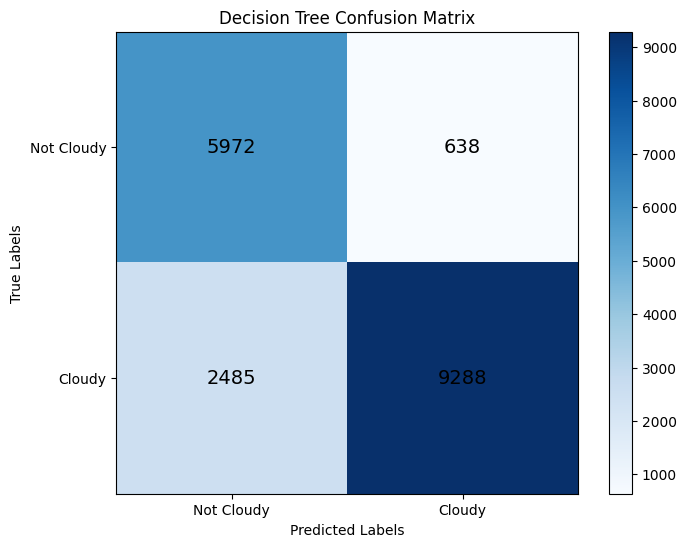

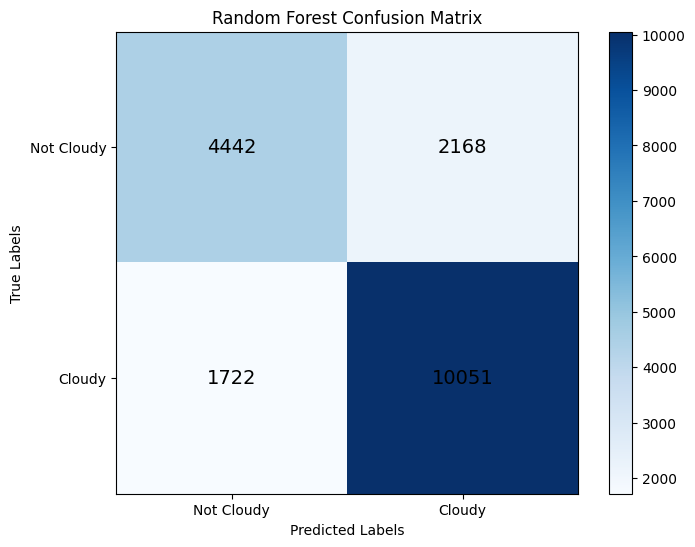

In [17]:
# Visualize confusion matricies
plt.figure(figsize=(8, 6))
plt.title("Decision Tree Confusion Matrix")
for i in range(dt_conf_matrix.shape[0]):
    for j in range(dt_conf_matrix.shape[1]):
        plt.text(j, i, str(dt_conf_matrix[i, j]), ha='center', va='center', color='black', fontsize=14)

plt.imshow(dt_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Not Cloudy', 'Cloudy'])
plt.yticks([0, 1], ['Not Cloudy', 'Cloudy'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

plt.figure(figsize=(8, 6))
plt.title("Random Forest Confusion Matrix")
for i in range(rf_conf_matrix.shape[0]):
    for j in range(rf_conf_matrix.shape[1]):
        plt.text(j, i, str(rf_conf_matrix[i, j]), ha='center', va='center', color='black', fontsize=14)

plt.imshow(rf_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Not Cloudy', 'Cloudy'])
plt.yticks([0, 1], ['Not Cloudy', 'Cloudy'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [19]:
#Adaboost classifiers made using both decision tree and random forest models, with cross validation scores printing below
abc = AdaBoostClassifier(dt_clf, n_estimators=5, learning_rate=1)
abc_model = abc.fit(X_train, y_train)
abc_predict = abc_model.predict(X_test)
abc_accuracy_score = accuracy_score(y_test,abc_predict)
print(abc_accuracy_score)
print("Cross-Validation Scores:", cross_val_score(abc, X_test,y_test))

abcrf = AdaBoostClassifier(rf_clf, n_estimators=5, learning_rate=1)
abcrf_model = abc.fit(X_train, y_train)
abcrf_predict = abc_model.predict(X_test)
abcrf_accuracy_score = accuracy_score(y_test,abcrf_predict)
print(abcrf_accuracy_score)
print("Cross-Validation Scores:", cross_val_score(abcrf, X_test,y_test))

0.7367132676929772
Cross-Validation Scores: [0.7666576  0.77862388 0.75523525 0.74102285 0.71109902]
0.7196866670293206
Cross-Validation Scores: [0.81098722 0.83736742 0.80255643 0.77774755 0.80821545]


In [ ]:
dt_feature_importances = best_dt_clf.feature_importances_
top_30_dt_features = X_train.columns[np.argsort(dt_feature_importances)[::-1][:30]]

rf_feature_importances = best_rf_clf.feature_importances_
top_30_rf_features = X_train.columns[np.argsort(rf_feature_importances)[::-1][:30]]

overlapping_features = 0
for i in top_30_dt_features:
  for j in top_30_rf_features:
    if i == j:
      overlapping_features += 1


print("Top 30 Important Features for Decision Tree:")
print(top_30_dt_features)

print("Top 30 Important Features for Random Forest:")
print(top_30_rf_features)

print(f'Number of overlapping features: {overlapping_features}')

print("Decision Tree Model Accuracy:", dt_accuracy)
print("Random Forest Model Accuracy:", rf_accuracy)

Top 30 Important Features for Decision Tree:
Index(['C06', 'C13', 'C04', 'C05', 'C01', 'C02', 'C07', 'Temperature_56',
       'Specific_humidity_67', 'Temperature_64', 'Temperature_91',
       'Specific_humidity_77', 'Temperature_65', 'Temperature_68',
       'Temperature_66', 'Temperature_67', 'Temperature_62', 'Temperature_63',
       'Temperature_57', 'Temperature_61', 'Temperature_60', 'Temperature_59',
       'Temperature_58', 'Temperature_70', 'Temperature_55', 'Temperature_54',
       'Temperature_53', 'Temperature_52', 'Temperature_69', 'Temperature_74'],
      dtype='object')
Top 30 Important Features for Random Forest:
Index(['C06', 'C02', 'C01', 'C15', 'C03', 'C14', 'C13', 'C05', 'C11', 'C07',
       'C10', 'Specific_humidity_98', 'C12', 'C04', 'Specific_humidity_90',
       'C08', 'Specific_humidity_96', 'Specific_humidity_75', 'C16',
       'Specific_humidity_88', 'Specific_humidity_101', 'Specific_humidity_93',
       'Specific_humidity_92', 'Specific_humidity_97', 'Speci

Discussion/Analysis: Looking at the accuracy scores alone, the decision tree performed 4% better than random forest. Looking at the confusion matrix, the decision tree does a better job of detecting true positives. There are more false positives in the random forest model. Overall, the decision tree performs better. This may be due to overoptimization of random forests, though that would not be expected given such small n_estimators. In order to avoid long runtimes, I was forced to eliminate hyperparameters such as max_depth and min_sample_leaf.